In [9]:
# import data

import pylab as py
import os
import numpy as np
import matplotlib.pyplot as plt

# print specification
np.set_printoptions(threshold = np.nan)

# folder containing only the data to be imported
path = 'C:\\Users\\abarrett.BNL\\Data\\2018.06.21\\ACS_3-5_layer_Gr_Cu\\Accumulations\\'

# import x data (just one array to go with every y)
xfile = path + 'Single Spectrum_015_Spec.Data 1 (X-Axis).txt'
with open(xfile, 'r') as f:
    x = np.loadtxt(f)

# import y data (list of spectra)
ydata = []
for filename in os.listdir(path):
    if 'Y' in filename:
        print(filename)
        fpath = path + filename
        with open(fpath, 'r') as f:
            y_temp = np.loadtxt(f)
        ydata.append(y_temp)


Single Spectrum_015_Spec.Data 1 (Y-Axis).txt
Single Spectrum_016_Spec.Data 1 (Y-Axis).txt
Single Spectrum_017_Spec.Data 1 (Y-Axis).txt
Single Spectrum_018_Spec.Data 1 (Y-Axis).txt
Single Spectrum_019_Spec.Data 1 (Y-Axis).txt
Single Spectrum_020_Spec.Data 1 (Y-Axis).txt
Single Spectrum_021_Spec.Data 1 (Y-Axis).txt
Single Spectrum_022_Spec.Data 1 (Y-Axis).txt
Single Spectrum_023_Spec.Data 1 (Y-Axis).txt
Single Spectrum_024_Spec.Data 1 (Y-Axis).txt
Single Spectrum_025_Spec.Data 1 (Y-Axis).txt
Single Spectrum_026_Spec.Data 1 (Y-Axis).txt
Single Spectrum_027_Spec.Data 1 (Y-Axis).txt


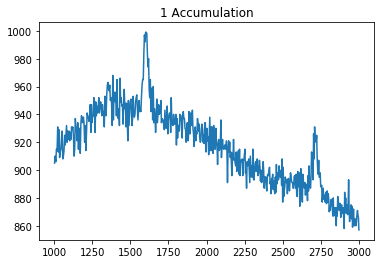

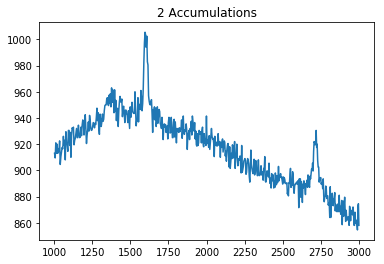

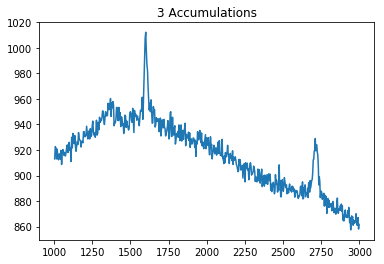

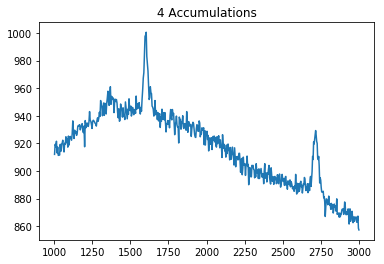

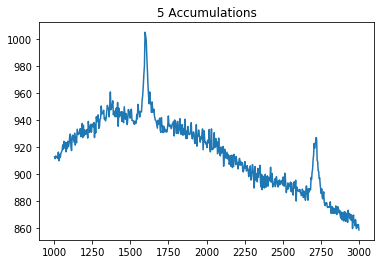

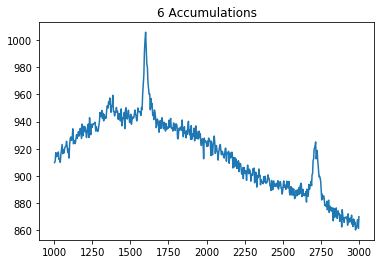

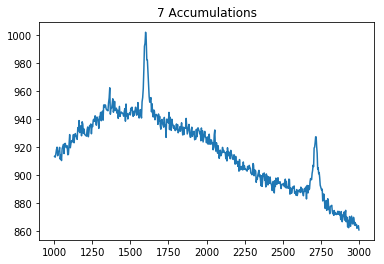

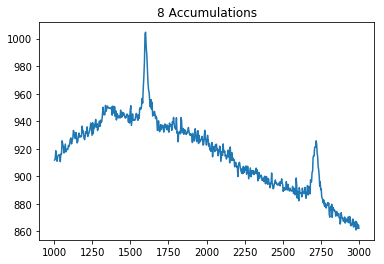

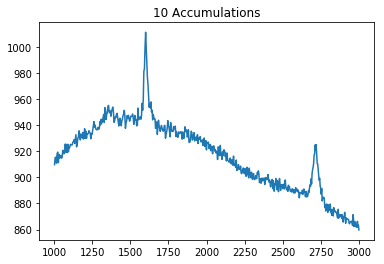

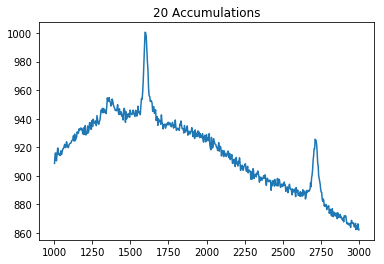

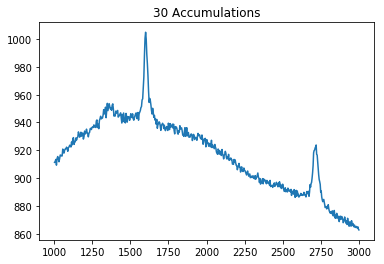

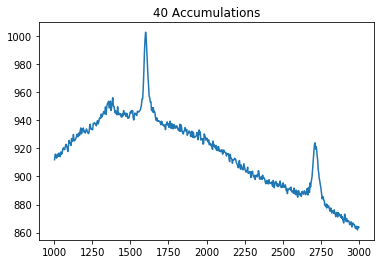

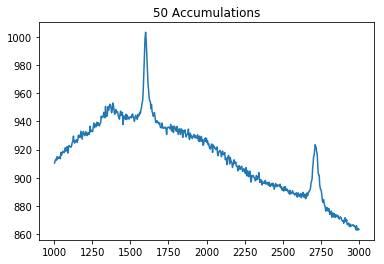

In [12]:
# plots

order = [3, 4, 5, 6, 1, 7, 8, 2, 9, 10, 11, 12, 0]
titles = ['1 Accumulation', '2 Accumulations', '3 Accumulations', '4 Accumulations', '5 Accumulations', '6 Accumulations', '7 Accumulations', '8 Accumulations', '10 Accumulations', '20 Accumulations', '30 Accumulations', '40 Accumulations', '50 Accumulations']

for i in range(len(ydata)):
    plt.figure(i)
    spec_start = np.argmax(x>1000)
    spec_end = np.argmax(x>3000)
    py.title(titles[i])
    py.plot(x[spec_start:spec_end],ydata[order[i]][spec_start:spec_end])
    py.show()

In [3]:
# run get_ratio.ipynb so get_ratio function can be used in this notebook

%run get_ratio.ipynb

# inputs for function:
# get_ratio(xdata, ydata, start_G_range, end_G_range, start_G_peak, start_2D_range, end_2D_range, start_2D_peak)

# outputs: [ratio, height_G, height_2D]

In [4]:
# get ratio, heights for each spectrum

# set parameters
num_rows = 4
num_columns = 10 

start_G_range = 1400
end_G_range = 1800
start_G_peak = 1500

start_2D_range = 2500
end_2D_range = 2900
start_2D_peak = 2550

# initialization
ratios = np.array([])
heights_G = np.array([])
heights_2D = np.array([])

# run function on each spectrum
for y in ydata:
    info = get_ratio(x, y, start_G_range, end_G_range, start_G_peak, start_2D_range, end_2D_range, start_2D_peak)
    ratios = np.append(ratios, info[0])
    heights_G = np.append(heights_G, info[1])
    heights_2D = np.append(heights_2D, info[2])

# make each a matrix with same geometry as scan
# assumes that the scan starts at top left corner, moves right across an entire row, and then 
# returns to the left to start the next row and proceeds in this manner until it finishes in 
# the bottom right corner
ratio_map = np.reshape(ratios, (num_rows, num_columns))
height_G_map = np.reshape(heights_G, (num_rows, num_columns))
height_2D_map = np.reshape(heights_2D, (num_rows, num_columns))

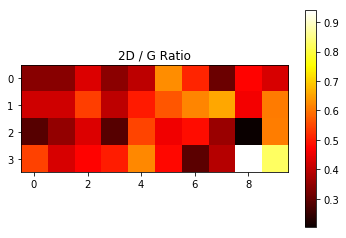

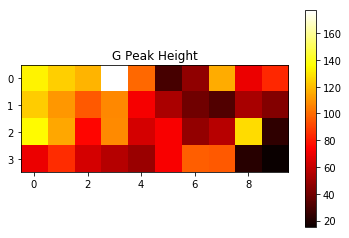

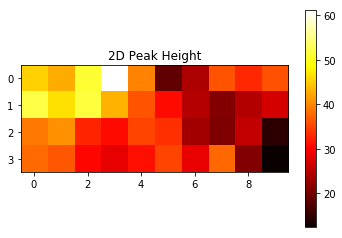

In [5]:
# make heatmaps 

plt.figure(1)
plt.imshow(ratio_map, cmap='hot', interpolation='nearest')
plt.title('2D / G Ratio')
plt.colorbar()
plt.show()

plt.figure(2)
plt.imshow(height_G_map, cmap='hot', interpolation='nearest')
plt.title('G Peak Height')
plt.colorbar()
plt.show()

plt.figure(3)
plt.imshow(height_2D_map, cmap='hot', interpolation='nearest')
plt.title('2D Peak Height')
plt.colorbar()
plt.show()


In [44]:
print(ratio_map)

[[0.34170092 0.34406286 0.43403849 0.34508143 0.39964607 0.62752082
  0.51340305 0.3119597  0.47499992 0.43051251]
 [0.42183317 0.42026327 0.54122211 0.40058255 0.50250907 0.56939172
  0.61959381 0.65684449 0.46258002 0.60897552]
 [0.2876338  0.35452488 0.43517681 0.28820908 0.54766419 0.45913327
  0.4875439  0.36406975 0.20288607 0.61187437]
 [0.54627778 0.42962551 0.47686051 0.50378838 0.62208848 0.48246938
  0.29478485 0.39336892 0.94180285 0.82535998]]


In [13]:
# set parameters

start_G_range = 1400
end_G_range = 1800
start_G_peak = 1500

start_2D_range = 2500
end_2D_range = 2900
start_2D_peak = 2550

# initialization
ratios = np.array([])
heights_G = np.array([])
heights_2D = np.array([])

# run function on each spectrum
for y in ydata:
    info = get_ratio(x, y, start_G_range, end_G_range, start_G_peak, start_2D_range, end_2D_range, start_2D_peak)
    ratios = np.append(ratios, info[0])
    heights_G = np.append(heights_G, info[1])
    heights_2D = np.append(heights_2D, info[2])
    
print('ratios : ' + str(ratios))
print('G heights : ' + str(heights_G))
print('2D heights : ' + str(heights_2D))

ratios : [0.68165074 0.70571144 0.68446334 0.68360613 0.63011116 0.66323434
 0.79633862 0.67261911 0.73048643 0.65072118 0.72979066 0.66663232
 0.68825777]
G heights : [63.50947234 65.4897179  63.00017346 64.09988983 68.84970469 69.72335627
 60.24324582 62.39478683 60.67734657 65.55310888 62.87422189 64.52257668
 61.91066557]
2D heights : [43.29127909 46.21684302 43.12130943 43.81907787 43.38296717 46.24292399
 47.97402327 41.96792581 44.32397813 42.65679608 45.88501986 43.01283503
 42.61049669]
